### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means.  What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.<br>

The "standard deviation" of the original data measures how spread out the individual data points are around the mean. It gives us an idea of the variability in our dataset.

The "standard error of the mean" specifically measures how much the sample mean is expected to vary from the true population mean. It’s essentially the standard deviation of the sample means we would get if we repeatedly sampled from the population.

So, while standard deviation focuses on the spread of individual data points, the standard error of the mean focuses on the reliability of the sample mean as an estimate of the population mean.

### 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this.  How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.<br>

Firstly, calculate the mean of the original sample dataset. Secondly, compute the standard error of the mean by using the standard deviation of our sample divided by the square root of the sample size. Thirdly, determine the margin of error, multiply the standard error of the mean by the critical value for a 95% confidence level(typically around 1.96 for a normal distribution). Finally, calculate the confidence interval, add and subtract the margin of error from the sample mean.



### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.<br>

We can use the percentile method. Firstly, resample the original dataset with replacement to create a large number of bootstrap samples. Secondly, calculate the mean for each resample to create a distribution of bootstrapped sample means. Thirdly, sort the bootstrapped means, order them from smallest to largest. Finally, find the 2.5th percentile and the 97.5th percentile of the sorted bootstrapped means.

### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).<br>

In [1]:
import numpy as np

# Sample data (replace with your actual data)
data = np.array([5.1, 7.3, 8.2, 6.8, 9.1, 7.7, 5.9, 6.4, 7.5, 8.3])

# Number of bootstrap samples
n_bootstrap = 10000

# Bootstrap resampling
bootstrap_means = []
for _ in range(n_bootstrap):
    # Resample with replacement
    sample = np.random.choice(data, size=len(data), replace=True)
    # Calculate mean of the resample
    bootstrap_means.append(np.mean(sample))

# Convert list to numpy array for easier percentile calculation
bootstrap_means = np.array(bootstrap_means)

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)

# Output the confidence interval for the mean
print(f"95% Bootstrap Confidence Interval for the Mean: [{ci_lower:.3f}, {ci_upper:.3f}]")

# To modify for the median (or any other statistic):
# 1. Replace np.mean(sample) with the desired statistic, like np.median(sample)
# 2. Here’s an example of how to do it for the median:

# Bootstrap resampling for the median
bootstrap_medians = []
for _ in range(n_bootstrap):
    sample = np.random.choice(data, size=len(data), replace=True)
    # Calculate median of the resample instead of the mean
    bootstrap_medians.append(np.median(sample))

# Convert list to numpy array for easier percentile calculation
bootstrap_medians = np.array(bootstrap_medians)

# Calculate the 95% confidence interval for the median (2.5th and 97.5th percentiles)
ci_lower_median = np.percentile(bootstrap_medians, 2.5)
ci_upper_median = np.percentile(bootstrap_medians, 97.5)

# Output the confidence interval for the median
print(f"95% Bootstrap Confidence Interval for the Median: [{ci_lower_median:.3f}, {ci_upper_median:.3f}]")


95% Bootstrap Confidence Interval for the Mean: [6.500, 7.940]
95% Bootstrap Confidence Interval for the Median: [6.350, 8.200]


Explanation:

Data: Replace data with the actual dataset.

Bootstrap Resampling: The code resamples the data (with replacement) n_bootstrap times, calculates the sample statistic (mean or median), and stores it.

Percentile Method: After collecting the bootstrapped sample statistics (means or medians), the 95% confidence interval is calculated by finding the 2.5th and 97.5th percentiles of the bootstrapped statistic.

Modification:

We can change the statistic computed for each resample.

Mean:

In [2]:
np.mean(sample)

6.85

Median:

In [3]:
np.median(sample)

6.85

Other statistics: 

In [4]:
np.std(sample)

1.3017296186228537

for the standard deviation

In [5]:
np.percentile(sample, 75)

7.7

for the 75th percentile

### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.<br>

Distinguishing between the population parameter and the sample statistic is crucial for understanding confidence intervals because the population parameter represents the true value we want to estimate, while the sample statistic is the value calculated from our sample data. The confidence interval provides a range of plausible values for the population parameter based on the variability and uncertainty inherent in the sample. This distinction highlights that our estimates are not exact and that we account for potential error when making inferences about the entire population.

### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics. <br>

1. What is the process of bootstrapping?

Bootstrapping is a method of resampling your data to estimate how a statistic varies. For example, if you have a sample of 10 people's heights, you create many new samples by randomly picking from this group, allowing for repeats. Each new sample lets you calculate the average height again. By repeating this process 1,000 or more times, you get many different averages, showing how much the statistic can change. This helps you understand how reliable your original average height is.

2. What is the main purpose of bootstrapping?

The main goal of bootstrapping is to estimate the uncertainty in a statistic, like the mean or median. It helps us understand how confident we can be about our sample results without needing more data. Instead of relying on complex formulas that assume certain conditions (like normal distribution), bootstrapping uses the data we already have. It demonstrates how much a statistic can vary by taking different samples from the same population.

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

If you guess that the average height in a population is 175 cm but only have a sample of 100 people, you can use bootstrapping to test your guess. 

First, create many resamples (like 1,000) from your original sample and calculate the average height for each. This gives you a distribution of possible sample means, showing how they can vary. 

Next, see where your guess of 175 cm falls in this distribution. If it's within the typical range of bootstrapped averages, your guess might be reasonable. If it's far outside that range, it's likely incorrect.

### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is **[on average]** not doing anything".  This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect **[on average]**".  Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.<br>

If a confidence interval includes zero, it means the true effect could be zero, suggesting the drug may not work. This leads us to "fail to reject the null hypothesis," which assumes no effect.

If the confidence interval does not include zero, it suggests the drug likely has an effect. In this case, we can reject the null hypothesis and conclude the drug is making a difference.

### 8. Complete the following assignment. 

1. Problem Introduction

The goal is to assess whether the new vaccine developed by AliTech is effective. The effectiveness will be evaluated by comparing the patients' initial and final health scores after receiving the vaccine.

Null Hypothesis: There is no significant effect of the vaccine on patients' health, meaning the difference between initial and final health scores is zero on average. Alternative Hypothesis: The vaccine has a significant effect on improving patients' health, so the difference between the initial and final health scores is not zero.

Data Visualization

Begin by creating visual representations to understand the data distribution and the difference between initial and final health scores.

Boxplot of initial vs. final health scores.

Histogram of the difference between final and initial health scores.

Scatter plot showing individual patients' initial and final health scores.

2. Quantitative Analysis

The main approach to test the hypothesis could be done using bootstrapping or a paired t-test since the same individuals are tested before and after the vaccine. Bootstrapping will allow us to estimate the confidence interval of the difference between the initial and final scores.

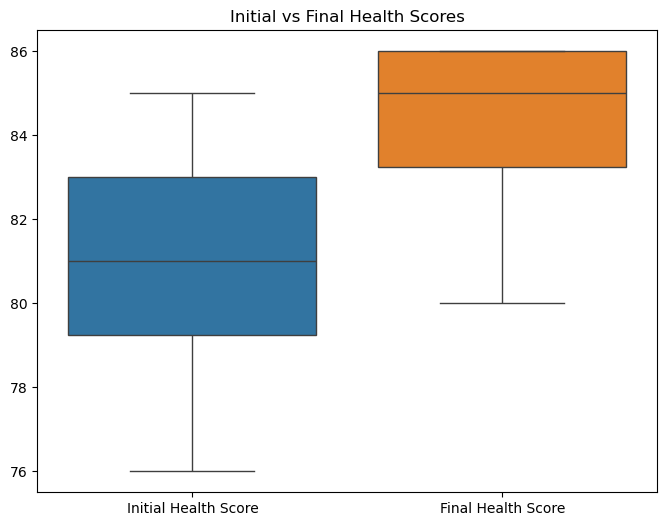

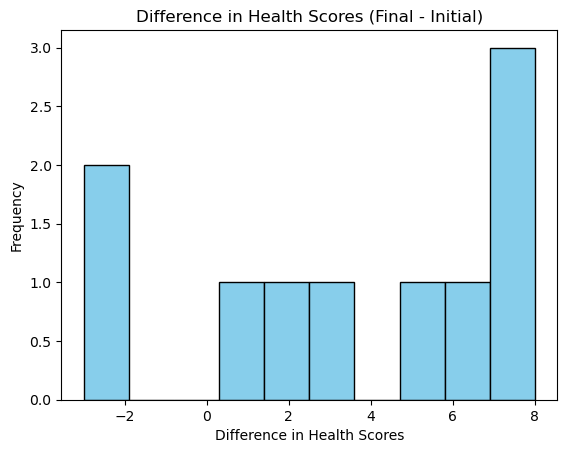

T-statistic: 2.5900615612703937, P-value: 0.02921052381549256
95% confidence interval for the mean difference: [0.9 5.6]


In [2]:
import pandas as pd

# Define the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save it to a CSV file
df.to_csv('vaccine_data.csv', index=False)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the CSV data
data = pd.read_csv('vaccine_data.csv')

# Visualizations
# Boxplot of Initial vs Final Health Scores
plt.figure(figsize=(8,6))
sns.boxplot(data=[data['InitialHealthScore'], data['FinalHealthScore']])
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.title('Initial vs Final Health Scores')
plt.show()

# Difference in health scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Histogram of the differences
plt.hist(data['HealthScoreDifference'], bins=10, color='skyblue', edgecolor='black')
plt.title('Difference in Health Scores (Final - Initial)')
plt.xlabel('Difference in Health Scores')
plt.ylabel('Frequency')
plt.show()

# Paired t-test
t_stat, p_value = stats.ttest_rel(data['FinalHealthScore'], data['InitialHealthScore'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Bootstrapping to estimate the confidence interval of the difference
np.random.seed(42)  # For reproducibility
n_iterations = 10000
means_diff = []

for _ in range(n_iterations):
    sample = data.sample(frac=1, replace=True)
    mean_diff = sample['HealthScoreDifference'].mean()
    means_diff.append(mean_diff)

confidence_interval = np.percentile(means_diff, [2.5, 97.5])
print(f"95% confidence interval for the mean difference: {confidence_interval}")


Methodology Explanation:

Paired t-test: Since we have dependent data (initial and final scores from the same patients), a paired t-test is suitable for comparing the means of the two related groups.

Bootstrapping: This method involves resampling with replacement and helps estimate the mean difference and confidence intervals.

3. Findings and Discussion

Visual Insights: Comment on the visualizations—are there visible differences between initial and final scores?

Test Results: If the p-value from the t-test is less than the significance level (usually 0.05), we reject the null hypothesis. Otherwise, we fail to reject it.

Bootstrapping Results: The confidence interval should either include zero or exclude zero.

4. Conclusion

Based on the statistical analysis, you can conclude whether the vaccine has a significant effect on patients' health. Summarize the key findings and how they relate to the null hypothesis.If we think about it further, could there be other variables (e.g., age, gender) affecting the outcome? And what would additional data reveal?

### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

Yes!

Here’s a summary of the homework assignment:

1. Difference between Standard Error of the Mean (SEM) and Standard Deviation:

SEM represents the variability of the sample mean if you took multiple samples from the population.
Standard Deviation (SD) measures the variability of individual data points within a sample.
While SD focuses on the spread of data points, SEM focuses on the precision of the sample mean as an estimate of the population mean.

2. Creating a 95% Confidence Interval (CI) Using SEM:

The formula assumes the distribution of sample means is approximately normal. The confidence interval tells us that we expect the true population mean to fall within this range 95% of the time.

3. Creating a 95% Bootstrapped Confidence Interval Without SEM:

Instead of relying on SEM, you can use the percentile method with bootstrapped sample means. By resampling the original data many times and calculating the mean for each resample, you can sort the means and take the 2.5th and 97.5th percentiles as the lower and upper bounds for the CI.

This method doesn’t assume a normal distribution and directly uses the variability observed in the bootstrapped sample means.

4. Bootstrapping Confidence Intervals for Other Statistics (e.g., Median):

Bootstrapping can also be used to create CIs for statistics other than the mean (e.g., the median). In this case, instead of calculating the mean for each bootstrap sample, you would calculate the median and find the 2.5th and 97.5th percentiles of the bootstrapped medians.

5. Why Distinguish Between Population Parameters and Sample Statistics in Confidence Intervals:

Population parameters (like the true mean or median) are unknown values describing the whole population.

Sample statistics are calculated from a subset of the population and used to estimate the population parameters.

Confidence intervals provide a range within which the true population parameter is likely to lie, based on the sample statistic. 

Understanding this distinction is crucial because confidence intervals are not about the sample statistic itself, but about estimating the unknown population parameter.

6. Explaining Bootstrapping and Its Purpose:

Bootstrapping is a method where you resample your data many times (with replacement) and calculate a statistic (like the mean) for each resample. This creates a distribution of that statistic, which helps estimate the variability of the statistic.

The main purpose is to assess how much a statistic (like the sample mean) might fluctuate and provide a confidence interval for the population parameter using the observed data.

7. Using Bootstrapping to Assess a Hypothesized Population Mean:

You can use bootstrapping to assess whether a hypothesized population mean is plausible. By bootstrapping the sample, you get a distribution of sample means. If the hypothesized value (e.g., 175 cm for average height) falls within this distribution (say, in the 95% CI), it’s plausible. If it doesn’t, the hypothesis might be rejected.

8. Why a Confidence Interval Overlapping Zero Fails to Reject the Null Hypothesis:
If a confidence interval includes zero, it means there’s a chance the true population effect could be zero (i.e., no effect). Even if the sample mean is not zero, the overlap suggests that the data isn’t strong enough to confidently reject the null hypothesis (which assumes no effect).

To reject the null hypothesis, the confidence interval must exclude zero, implying that a zero effect is not plausible based on the sample data.

https://chatgpt.com/share/66ff5e72-6c84-8004-a0c5-13bb0c8ec64c   chat log histories